# Diabetes Prediction via a Regression Analysis

* By. Gukhwan Hyun

# Packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
# from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.gofplots import qqplot

import scipy.stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

한글깨짐 해결

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

압축파일처리

In [ ]:
# import zipfile
# path_to_zip_file = '/content/drive/MyDrive/Data Science/국민건강보험공단_건강검진정보_20201231.zip'
# directory_to_extract_to = '/content/drive/MyDrive/Data Science/physicals'

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

# Load the dataset
  * skipped a single data due to an error

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Data_Analysis/Regression_Analysis/SCR_2019_1백만20210119수정.csv', 
                      encoding='cp949',
                      error_bad_lines=False)
dataset

b'Skipping line 175683: expected 34 fields, saw 36\n'


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,2019-12-31
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063613,2019,999996,41,1,12,170,65,80.0,1.0,1.2,1.0,1.0,116.0,79.0,129.0,NaN,NaN,NaN,NaN,15.7,1.0,1.3,24.0,23.0,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
1063614,2019,999997,11,1,9,170,55,75.0,0.9,0.8,1.0,1.0,99.0,61.0,130.0,157.0,50.0,54.0,93.0,15.4,2.0,0.9,16.0,15.0,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,2019-12-31
1063615,2019,999998,45,1,13,160,65,92.3,1.0,0.9,1.0,1.0,116.0,70.0,102.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,23.0,28.0,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,2019-12-31
1063616,2019,999999,30,1,8,170,75,85.0,0.8,0.8,1.0,1.0,112.0,71.0,89.0,NaN,NaN,NaN,NaN,15.3,1.0,1.0,25.0,65.0,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,2019-12-31


# Data Preprocessing

In [3]:
diabetes = dataset.copy()

In [4]:
diabetes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063618 entries, 0 to 1063617
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1063618 non-null  int64  
 1   가입자 일련번호       1063618 non-null  int64  
 2   시도코드           1063618 non-null  int64  
 3   성별코드           1063618 non-null  int64  
 4   연령대 코드(5세단위)   1063618 non-null  int64  
 5   신장(5Cm단위)      1063618 non-null  int64  
 6   체중(5Kg 단위)     1063618 non-null  int64  
 7   허리둘레           1063195 non-null  float64
 8   시력(좌)          1063411 non-null  float64
 9   시력(우)          1063418 non-null  float64
 10  청력(좌)          1063427 non-null  float64
 11  청력(우)          1063430 non-null  float64
 12  수축기 혈압         1057819 non-null  float64
 13  이완기 혈압         1057818 non-null  float64
 14  식전혈당(공복혈당)     1057714 non-null  float64
 15  총 콜레스테롤        354892 non-null   float64
 16  트리글리세라이드       354887 non-null   float64
 17  HDL 콜레스테

## Elimination
  *  Irrelevant infos
  *  Missing values

In [5]:
diabetes.drop(columns=['기준년도', '가입자 일련번호', '구강검진 수검여부', '총 콜레스테롤', '트리글리세라이드', '음주여부',
                       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '허리둘레',
                       '청력(좌)', '청력(우)','HDL 콜레스테롤', 'LDL 콜레스테롤', '치아우식증유무','치아마모증유무',
                       '결손치 유무', '제3대구치(사랑니) 이상', '치석', '데이터 공개일자'], inplace=True)

In [6]:
diabetes.dropna(inplace=True)

In [7]:
diabetes.reset_index(inplace=True)

In [8]:
diabetes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052215 entries, 0 to 1052214
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   index         1052215 non-null  int64  
 1   시도코드          1052215 non-null  int64  
 2   성별코드          1052215 non-null  int64  
 3   연령대 코드(5세단위)  1052215 non-null  int64  
 4   신장(5Cm단위)     1052215 non-null  int64  
 5   체중(5Kg 단위)    1052215 non-null  int64  
 6   시력(좌)         1052215 non-null  float64
 7   시력(우)         1052215 non-null  float64
 8   수축기 혈압        1052215 non-null  float64
 9   이완기 혈압        1052215 non-null  float64
 10  식전혈당(공복혈당)    1052215 non-null  float64
 11  혈색소           1052215 non-null  float64
 12  요단백           1052215 non-null  float64
 13  감마 지티피        1052215 non-null  float64
 14  흡연상태          1052215 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 120.4 MB


## Categorization, Factorization
  * 시도코드, 성별코드, 흡연상태 --> 이름
  * 연령대 --> 10살 단위

In [9]:
diabetes['시도코드'] = diabetes['시도코드'].astype(str)

In [10]:
diabetes['시도코드'].replace(to_replace=['11', '26', '27', '28', '29', '30', '31', '36', '41', '42', '43', '44', '45', '46', '47', '48', '50'],
                           value = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시','대전광역시', '울산광역시', 
                              '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도','전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
                         inplace=True)


In [11]:
diabetes['성별코드'] = diabetes['성별코드'].replace(to_replace=[1,2],
                         value=['Male', 'Female'])

In [12]:
diabetes['요단백'].value_counts()

1.0    984949
2.0     38176
3.0     19479
4.0      6802
5.0      2206
6.0       603
Name: 요단백, dtype: int64

In [13]:
diabetes['요단백'] = diabetes['요단백'].astype(str)

In [14]:
diabetes['흡연상태'].value_counts()

1.0    662225
2.0    389990
Name: 흡연상태, dtype: int64

In [15]:
diabetes['흡연상태'].replace(to_replace=[1.0, 2.0],
                         value = ['Smoker', 'Non-smoker'],
                         inplace=True)

In [16]:
diabetes['연령대 코드(5세단위)'].unique()

array([13,  5, 12, 10,  8,  6, 14, 11, 16,  9,  7, 18, 15, 17])

5,6 20s

7,8 30s
  
9,10 40s

11,12 50s

13,14 60s

15,16 70s

17~ over80s

In [17]:
diabetes['Age_group'] = pd.cut(diabetes['연령대 코드(5세단위)'],
       bins=list(range(4, 20, 2)),
       labels= ['20s', '30s', '40s', '50s', '60s', '70s','over80s'])

## Feature Engineering
  * 키, 몸무게 --> BMI
  * 시력 좌우 평균 
  * 수축기혈압, 이완기혈압 --> 고혈압

In [18]:
def bmi_calculator(height_data, weight_data):
  bmi = []
  for height, weight in zip(height_data, weight_data):
    val = weight / ((height/100)**2)
    val = round(val, 1)
    bmi.append(val)
  return pd.DataFrame(bmi)

In [19]:
diabetes['BMI'] = bmi_calculator(diabetes['신장(5Cm단위)'].values, diabetes['체중(5Kg 단위)'].values)

In [ ]:
# def avg_eyesight(left, right):
#   eyesights = []
#   for l,r in zip(left, right):
#     eyesight = (l+r)/2
#     eyesights.append(eyesight)
#   return pd.DataFrame(eyesights)

In [ ]:
# diabetes['평균시력'] = avg_eyesight(diabetes['시력(좌)'].values, diabetes['시력(우)'].values)

In [20]:
def blood_pressure(compressed, decompressed):
  bps = []
  for c,u in zip(compressed, decompressed):
    if c >= 140 and u >=90:
      bps.append('Hypertension')
    else:
      bps.append('Normal')
  return pd.DataFrame(bps)

In [21]:
diabetes['고혈압'] = blood_pressure(diabetes['수축기 혈압'].values, diabetes['이완기 혈압'].values)

# EDA

In [22]:
eda = diabetes.drop(columns=['index','연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압'])
eda

,시도코드,성별코드,식전혈당(공복혈당),혈색소,요단백,감마 지티피,흡연상태,Age_group,BMI,고혈압
0,서울특별시,Male,93.0,15.5,1.0,47.0,Non-smoker,60s,23.9,Normal
1,경상남도,Female,89.0,14.0,1.0,13.0,Smoker,20s,18.7,Normal
2,경기도,Male,100.0,15.6,1.0,17.0,Smoker,60s,27.3,Normal
3,인천광역시,Male,85.0,14.5,1.0,32.0,Non-smoker,50s,20.8,Normal
4,경기도,Male,91.0,14.9,1.0,19.0,Non-smoker,40s,24.2,Normal
...,...,...,...,...,...,...,...,...,...,...
1052210,경기도,Male,129.0,15.7,1.0,21.0,Smoker,50s,22.5,Normal
1052211,서울특별시,Male,130.0,15.4,2.0,27.0,Non-smoker,40s,19.0,Normal
1052212,전라북도,Male,102.0,15.9,1.0,84.0,Non-smoker,60s,25.4,Normal
1052213,대전광역시,Male,89.0,15.3,1.0,29.0,Non-smoker,30s,26.0,Normal


In [ ]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052215 entries, 0 to 1052214
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   시도코드        1052215 non-null  object  
 1   성별코드        1052215 non-null  int64   
 2   식전혈당(공복혈당)  1052215 non-null  float64 
 3   혈색소         1052215 non-null  float64 
 4   요단백         1052215 non-null  object  
 5   감마 지티피      1052215 non-null  float64 
 6   흡연상태        1052215 non-null  object  
 7   Gender      1052215 non-null  object  
 8   Age group   1052215 non-null  category
 9   BMI         1052215 non-null  float64 
 10  고혈압         1052215 non-null  object  
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 81.3+ MB


In [23]:
numerical_features = eda.dtypes[(eda.dtypes != object) & (eda.dtypes != 'category')].index
categorical_features = eda.dtypes[(eda.dtypes == object) | (eda.dtypes == 'category')].index

print('Numerical features =',numerical_features.values, sep='\n')
print()
print('Categorical features =',categorical_features.values, sep='\n')

Numerical features =
['식전혈당(공복혈당)' '혈색소' '감마 지티피' 'BMI']

Categorical features =
['시도코드' '성별코드' '요단백' '흡연상태' 'Age_group' '고혈압']


## Linearity Check (선형성 확인)
  * 종속변수 : 공복혈당


### 수치형
  * BMI, 혈색소가 선형적인 관계를 보임

In [ ]:
for feature in numerical_features:
  if feature != '식전혈당(공복혈당)':
    plt.scatter(eda[feature], eda['식전혈당(공복혈당)'])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("식전혈당(공복혈당)",fontsize=20)
    plt.xlabel(feature,fontsize=20)
    plt.show()
    print('*'*100)

Boxplot 으로 데이터 분포 및 outlier 확인

극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있다. 상자 그림을 그려서 극단값이 있는지 확인해본다. 

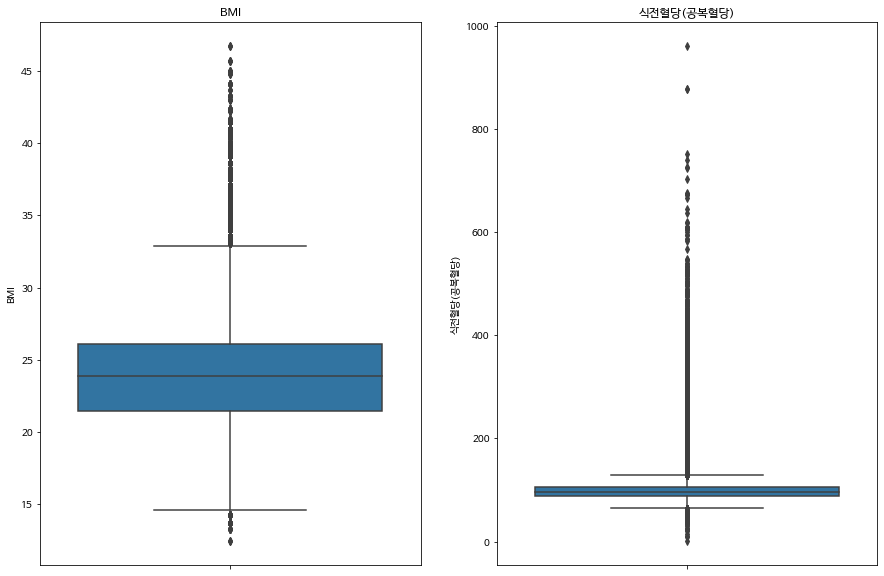

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))  

# BMI의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot(y= 'BMI', data=eda, ax=ax1, orient='v')
ax1.set_title('BMI')

# Fasting_Blood_Sugar의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot(y= '식전혈당(공복혈당)', data=eda, ax=ax2, orient='v')
ax2.set_title('식전혈당(공복혈당)')

plt.show()

In [ ]:
eda[eda['식전혈당(공복혈당)'] >= 800]

,시도코드,성별코드,식전혈당(공복혈당),혈색소,요단백,감마 지티피,흡연상태,Age_group,BMI,고혈압
115417,부산광역시,Male,878.0,14.1,4.0,141.0,Smoker,50s,22.5,Normal
178343,부산광역시,Male,878.0,14.1,4.0,141.0,Smoker,50s,22.5,Normal
986713,경기도,Female,960.0,12.0,1.0,40.0,Smoker,50s,23.8,Normal


In [ ]:
eda.drop(index=[115417,178343,986713], inplace=True)
eda.reset_index(inplace=True)
eda.drop(columns=['index'], inplace=True)

### 범주형 

  * 요단백수치, 흡연, 성별, 나이, 고혈압은 확실한 상관관계를 보임
  * 지역은 단순히 지역이 요인이 아닐 것으로 추정 (식생활?)

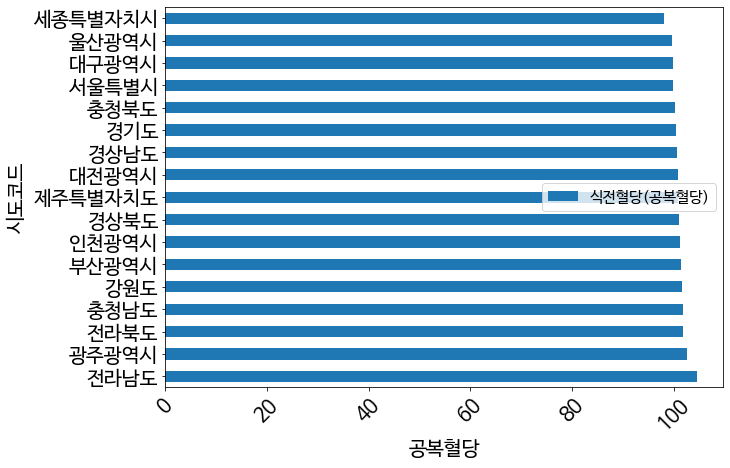

****************************************************************************************************


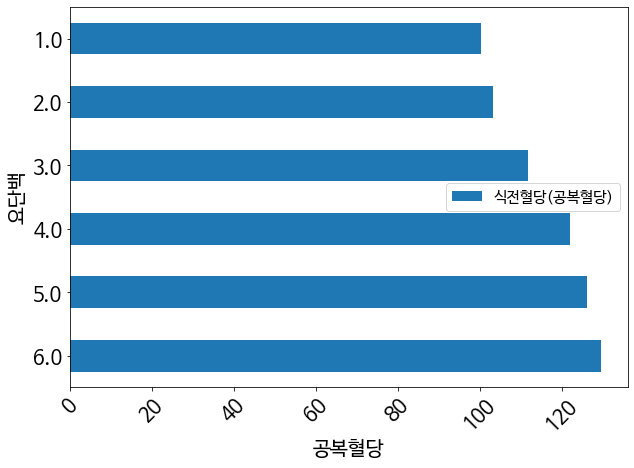

****************************************************************************************************


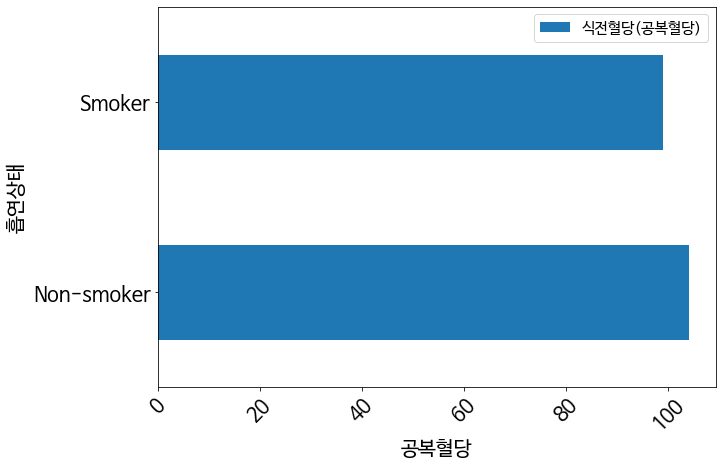

****************************************************************************************************


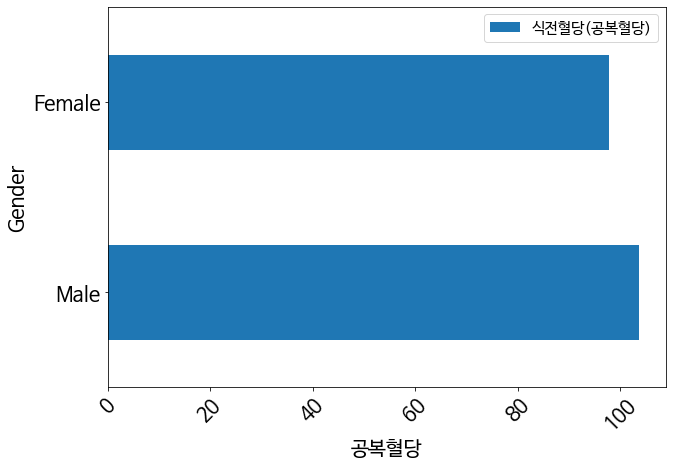

****************************************************************************************************


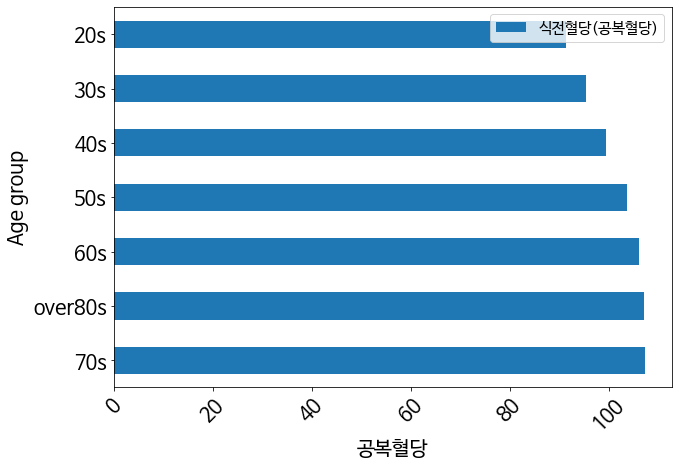

****************************************************************************************************


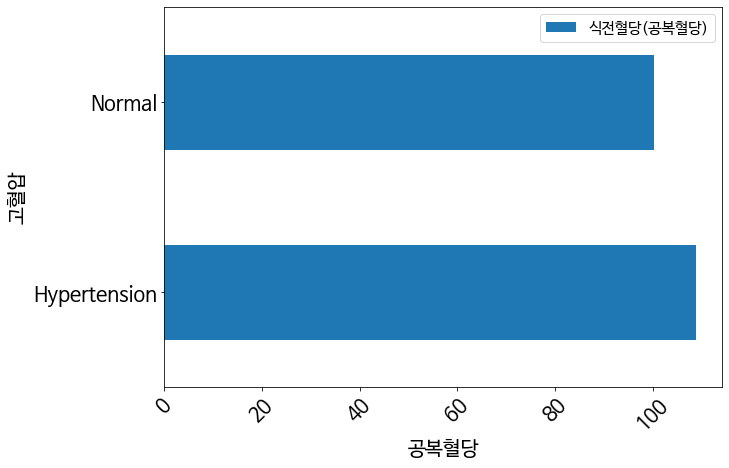

****************************************************************************************************


In [ ]:
for col in categorical_features:
  eda.groupby(col)['식전혈당(공복혈당)'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,7))
  plt.xticks(rotation=45, fontsize=15)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel("공복혈당",fontsize=20)
  plt.ylabel(col,fontsize=20)
  plt.legend(fontsize=15)
  plt.show()
  print('*'*100)

# Regression Model



독립변수 :
요단백수치, 흡연, 성별, 나이, 고혈압, BMI, 혈색소

종속변수 : 공복혈당

In [ ]:
eda.columns

Index(['시도코드', '성별코드', '식전혈당(공복혈당)', '혈색소', '요단백', '감마 지티피', '흡연상태',
       'Age_group', 'BMI', '고혈압'],
      dtype='object')

In [25]:
ra = eda.rename(columns={'시도코드' : 'Region',
                    '성별코드' : "Gender", 
                    '식전혈당(공복혈당)' : "Fasting_Blood_Sugar",
                    '혈색소' : "Hemoglobin",
                    '요단백' : "Proteinuria",
                    '감마 지티피' : "Gamma_GTP",
                    '흡연상태' : 'Smoke',
                    '고혈압' : 'Blood_pressure'})
ra

,Region,Gender,Fasting_Blood_Sugar,Hemoglobin,Proteinuria,Gamma_GTP,Smoke,Age_group,BMI,Blood_pressure
0,서울특별시,Male,93.0,15.5,1.0,47.0,Non-smoker,60s,23.9,Normal
1,경상남도,Female,89.0,14.0,1.0,13.0,Smoker,20s,18.7,Normal
2,경기도,Male,100.0,15.6,1.0,17.0,Smoker,60s,27.3,Normal
3,인천광역시,Male,85.0,14.5,1.0,32.0,Non-smoker,50s,20.8,Normal
4,경기도,Male,91.0,14.9,1.0,19.0,Non-smoker,40s,24.2,Normal
...,...,...,...,...,...,...,...,...,...,...
1052210,경기도,Male,129.0,15.7,1.0,21.0,Smoker,50s,22.5,Normal
1052211,서울특별시,Male,130.0,15.4,2.0,27.0,Non-smoker,40s,19.0,Normal
1052212,전라북도,Male,102.0,15.9,1.0,84.0,Non-smoker,60s,25.4,Normal
1052213,대전광역시,Male,89.0,15.3,1.0,29.0,Non-smoker,30s,26.0,Normal


선형회귀분석은 독립변수와 종속변수가 정규분포를 따를 때 잘 작동한다. 밀도 플롯(density plot)을 그려서 정규분포의 형태인지 확인해본다.

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))  

# BMI의 밀도 플롯
sns.kdeplot(ra['BMI'], ax=ax1)
ax1.set_title('BMI')

# FBS의 밀도 플롯
sns.kdeplot(ra['Fasting_Blood_Sugar'], ax=ax2)
ax2.set_title('Fasting_Blood_Sugar')

plt.show()

데이터가 치우친 정도를 나타내는 왜도(skewness)를 구해본다. e1071 라이브러리가 없을 경우에는 install.packages('e1071')을 실행하여 설치한다.

In [ ]:
print('Skewness of BMI = ',scipy.stats.skew(ra['BMI']))
print('Skewness of FBS = ',scipy.stats.skew(ra['Fasting_Blood_Sugar']))

## 단순회귀

종속변수 ~ 독립변수의 형태로 모형식을 쓴다. 

(수학에서는 y= f(x)처럼 종속변수를 왼쪽에, 독립변수를 오른쪽에 쓰는 것이 관습)

참고) 절편의 고정

Intercept 의 coef 가 음수 이고, 종속변수의 값이 음수가 될 수 없을 경우
절편을 제거하여 절편을 0 으로 고정 시킨 것과 같이 만든다.

모형에서 절편을 제거한 경우 R제곱을 해석할 때 주의가 필요하다. 절편이 있는 경우와 없는 경우 계산 방식이 다르기 때문이다. 절편이 있는 경우에 R제곱은 종속변수의 분산에서 설명하는 비율을 나타내지만, 절편이 없는 경우는 종속변수의 제곱의 평균에서 설명하는 비율을 나타낸다.

In [ ]:
ra.columns

Index(['Region', 'Gender_OH', 'Fasting_Blood_Sugar', 'Hemoglobin',
       'Proteinuria', 'Gamma_GTP', 'Smoke', 'Gender', 'Age group', 'BMI',
       'Blood_pressure'],
      dtype='object')

In [ ]:
# model = ols('Fasting_Blood_Sugar ~ BMI', data=ra)
# res = model.fit()
# print(res.summary())

### 공복혈당 ~ BMI

In [26]:
X=ra['BMI']
Y=ra['Fasting_Blood_Sugar']
X = add_constant(X)
model = OLS(Y,X)
res = model.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Fasting_Blood_Sugar   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.032
Method:                  Least Squares   F-statistic:                 3.443e+04
Date:                 Sat, 25 Dec 2021   Prob (F-statistic):               0.00
Time:                         04:51:25   Log-Likelihood:            -4.8083e+06
No. Observations:              1052215   AIC:                         9.617e+06
Df Residuals:                  1052213   BIC:                         9.617e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8232      0.153    476.88

* 모델적합도 :

Fasting_Blood_Sugar에 대하여 BMI로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,1052213) = 3.443e+04, p < 0.05).

* 모델 설명력 :

R-squared = 0.032, 3% 정도의 설명력을 보였다


* 독립변수 영향력 :

BMI의 회귀계수는 1.1676 로, Fasting_Blood_Sugar에 대하여 유의미한 예측 변인인 것으로 나타났다(t(1052213) = 185.565, p < 0.05).

### 공복혈당 ~ 혈색소

In [ ]:
X=ra['Hemoglobin']
Y=ra['Fasting_Blood_Sugar']
X = add_constant(X)
model = OLS(Y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Hemoglobin   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                 7.831e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:10:45   Log-Likelihood:            -1.9256e+06
No. Observations:             1052215   AIC:                         3.851e+06
Df Residuals:                 1052213   BIC:                         3.851e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5265      0.010   1168.573      0.0

## 다중회귀

### 공복혈당 ~ BMI + 혈색소

In [ ]:
X=ra[['BMI','Hemoglobin']]
Y=ra['Fasting_Blood_Sugar']
X = add_constant(X)
model = OLS(Y,X)
res = model.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Fasting_Blood_Sugar   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                  0.036
Method:                  Least Squares   F-statistic:                 1.940e+04
Date:                 Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                         06:14:13   Log-Likelihood:            -4.8062e+06
No. Observations:              1052215   AIC:                         9.612e+06
Df Residuals:                  1052212   BIC:                         9.612e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5454      0.231    266.41

### 공복혈당 ~ all

In [ ]:
feats=['BMI','Hemoglobin','C(Gender)','C(Blood_pressure)','C(Smoke)','C(Proteinuria)']
"Fasting_Blood_Sugar ~" + "+".join(feats)

model = OLS.from_formula("Fasting_Blood_Sugar ~" + "+".join(feats),data=ra)
res = model.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Fasting_Blood_Sugar   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                  0.054
Method:                  Least Squares   F-statistic:                     6029.
Date:                 Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                         12:01:14   Log-Likelihood:            -4.7942e+06
No. Observations:              1052212   AIC:                         9.588e+06
Df Residuals:                  1052201   BIC:                         9.589e+06
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercep

# Model Validation

# 1.모델 적합도 분석 
잔차 분석 (Residual Analysis)
* 예측값(fitted)과 잔차(residual)의 비교
* 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
* 실선은 잔차의 추세를 나타냄
* 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

In [27]:
fitted = res.predict(X) # 예측값
residual = ra['Fasting_Blood_Sugar'] - fitted # 잔차 = (실제값-예측값)

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'yellow'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='red')
plt.show()

## Normality Test (정규성)

* 잔차의 정규성 검증
* 잔차가 정규분포를 따른다는 가정
* Q-Q 플롯으로 확인할 수 있음
* 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

Residual Quantile

In [33]:
print('Residual Min = ', np.min(residual)) # 0
print('Residual Q1 = ',np.quantile(residual, 0.25))
print('Residual Q2 = ',np.quantile(residual, 0.5))
print('Residual Q3 = ',np.quantile(residual, 0.75))
print('Residual Max = ', np.max(residual)) # 1

Residual Min =  -98.1454129823638
Residual Q1 =  -11.414739451188439
Residual Q2 =  -4.282926004802533
Residual Q3 =  4.438395315640605
Residual Max =  859.3875403792326


Skewness of residual =  4.717988595692517


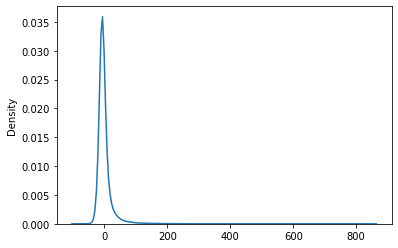

In [57]:
print('Skewness of residual = ',scipy.stats.skew(residual))
sns.kdeplot(residual);

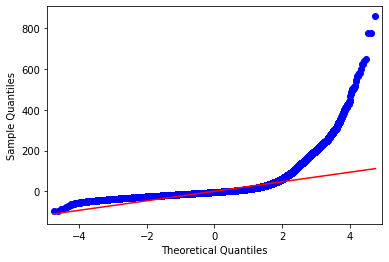

In [67]:
qqplot(residual, line='s', fit=False) # line ='45', 's', 'r', 'q'
plt.show()

### Handling Skewness

right (positive) skewness = log (x)

log1p = log (x+1) : log(0) 이 -inf가 되는 것을 막아 더 효율적

값중에 -1 보다 큰 마이너스값이 있으면, 가장 작은값을 더해줌


Skewness of residual =  1.946553109446279


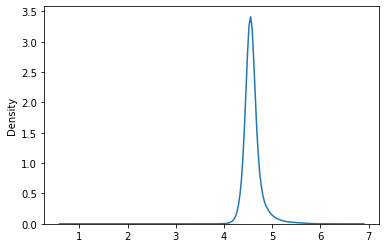

In [92]:
log_residual = np.log1p(residual + 99)

print('Skewness of residual = ',scipy.stats.skew(log_residual))
sns.kdeplot(log_residual);

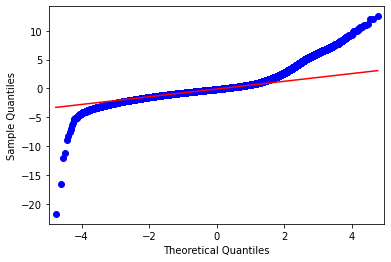

In [98]:
qqplot(log_residual, line='q', fit=True) # line ='45', 's', 'r', 'q'
plt.show()

In [ ]:
# rand = np.random.randn(100)
# rand
# for line in ['45','s', 'r', 'q']:
#   print(line)
#   qqplot(rand, line=line)
#   plt.show()

In [100]:
# 샤피로검정 (0.05 이상이어야, 정규성 만족)
print('Shapiro_residual', scipy.stats.shapiro(residual))
print('Shapiro_log', scipy.stats.shapiro(log_residual))

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro_residual (0.6652841567993164, 0.0)
Shapiro_log (0.8635473251342773, 0.0)


## 등분산성 검정

* 잔차의 등분산성
* 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
* 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
* 빨간색 실선이 수평선을 그리는 것이 이상적

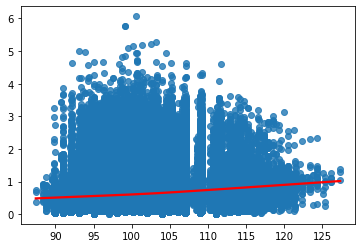

In [ ]:
sr = scipy.stats.zscore(residual)
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

## 독립성 검정
* 회귀분석에서 잔차는 정규성, 등분산성 그리고 독립성을 가지는 것으로 가정
* 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
* 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시


In [ ]:
# 0~4 사이에 나오며 2에 가까울수록 자기상관없이 독립.
durbin_watson(residual)

2.000155333899586

## Outlier Check (이상치)

Cook's distance는 극단값을 나타내는 지표


In [101]:
cd, _ = OLSInfluence(res).cooks_distance

In [102]:
# 1보다 크면 이상치
cd.sort_values(ascending=False).head()

608433     0.001613
961798     0.001311
1029672    0.001137
17201      0.001099
444246     0.001002
dtype: float64

잔차 분석 결과를 바탕으로 대응

잔차 분석 결과에 따라 다양한 방식의 대응이 가능
* 극단값을 제거
* 독립변수를 추가
* 종속변수를 수학적으로 변환

# 2.변수 영향력 분석
 * 다중회귀인 경우 

#### 다중공선성 확인

In [ ]:
X=ra['BMI']
Y=ra[['Fasting_Blood_Sugar', 'Hemoglobin']]
X = add_constant(X)
model_multi = OLS(Y,X)
res = model_multi.fit()
print(res.summary)

독립변수들의 이름

In [111]:
model_multi.exog_names

['const', 'BMI']

X의 첫번째 독립변수의 VIF를 계산

In [108]:
variance_inflation_factor(model_multi.exog, 0)

44.99016518812172

In [109]:
variance_inflation_factor(model_multi.exog, 1)

0.9999999999999729

한번에 모든 VIF 계산

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_multi.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

# Machine Learning

* 변수간의 상관관계가 통계적으로 유의함으로, 머신러닝을 통해 예측값 계산

## Linear Regression

In [ ]:
X=np.array(ra['BMI']).reshape(-1,1)
y=np.array(ra['Fasting_Blood_Sugar'])
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('RMSE_train = ', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))
print('RMSE_test = ', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))
print('R2_train = ',r2_score(y_train, lin_reg.predict(X_train)))
print('R2_test = ',r2_score(y_test, lin_reg.predict(X_test)))

RMSE_train =  23.301939348156207
RMSE_test =  23.360997206117403
R2_train =  0.031578034593401916
R2_test =  0.032687337917356896


## Multiple Regression

In [ ]:
df_ML = pd.get_dummies(ra, drop_first=True)
features = df_ML.loc[:, 'Hemoglobin':'Blood_pressure_Normal']

In [ ]:
features.columns

Index(['Hemoglobin', 'Gamma_GTP', 'BMI', 'Region_경기도', 'Region_경상남도',
       'Region_경상북도', 'Region_광주광역시', 'Region_대구광역시', 'Region_대전광역시',
       'Region_부산광역시', 'Region_서울특별시', 'Region_세종특별자치시', 'Region_울산광역시',
       'Region_인천광역시', 'Region_전라남도', 'Region_전라북도', 'Region_제주특별자치도',
       'Region_충청남도', 'Region_충청북도', 'Gender_Male', 'Proteinuria_2.0',
       'Proteinuria_3.0', 'Proteinuria_4.0', 'Proteinuria_5.0',
       'Proteinuria_6.0', 'Smoke_Smoker', 'Age_group_30s', 'Age_group_40s',
       'Age_group_50s', 'Age_group_60s', 'Age_group_70s', 'Age_group_over80s',
       'Blood_pressure_Normal'],
      dtype='object')

In [ ]:
# X=np.array(ra['BMI']).reshape(-1,1)
X = features.values
y=np.array(ra['Fasting_Blood_Sugar'])

In [ ]:
X[0]

array([15.5, 47. , 23.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size=0.2)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((841769, 33), (841769,), (210443, 33), (210443,))

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.coef_ # w_1 : slope or weight 

array([ 6.39780276e-01,  5.29002420e-02,  7.83802443e-01, -1.64381521e-02,
       -7.70502691e-02, -2.76661111e-01,  2.57343812e+00, -4.97469581e-01,
        4.91568619e-01,  5.90142850e-01, -1.96933746e-01, -1.28551816e+00,
       -8.70536313e-01,  4.99006576e-01,  2.71320899e+00,  7.32124421e-01,
       -2.53000108e-01,  7.02783314e-01, -7.12613480e-01,  1.59907055e+00,
        2.94304215e+00,  9.61893193e+00,  1.70282964e+01,  2.11082351e+01,
        2.38726351e+01, -1.31643386e+00,  2.15990753e+00,  6.08311246e+00,
        1.05255527e+01,  1.31421256e+01,  1.47900541e+01,  1.56599073e+01,
       -2.83871492e+00])

In [ ]:
lin_reg.intercept_ # w_0 : y-intercept or bias

65.15450048136799

In [ ]:
# 훈련셋과 직선의 방정식(선형 회귀식) 시각화
# plt.scatter(X, y)

# x = np.array([10,50]) # x values
# y = lin_reg.intercept_ + lin_reg.coef_[0] * x # y_hat

# plt.plot(x,y,'r')

# plt.grid();

In [ ]:
# RMSE
print('RMSE_train = ', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))
print('RMSE_test = ', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))

RMSE_train =  22.382801469382937
RMSE_test =  22.28471357274839


In [ ]:
# R^2
print('R2_train = ',r2_score(y_train, lin_reg.predict(X_train)))
print('R2_test = ',r2_score(y_test, lin_reg.predict(X_test)))

R2_train =  0.1086942661927972
R2_test =  0.11094717893683093


In [ ]:
number = 20

predicted_val = lin_reg.predict(X_test[:number])

pd.DataFrame(data={'predicted': np.round(predicted_val,2),
                   'Actual' : y_test[:number],
                   'residual' : np.round(predicted_val,2) - y_test[:number]})

,predicted,Actual,residual
0,92.88,129.0,-36.12
1,100.55,80.0,20.55
2,111.27,110.0,1.27
3,107.92,113.0,-5.08
4,107.80,110.0,-2.20
5,89.28,84.0,5.28
6,103.24,80.0,23.24
7,103.08,89.0,14.08
8,83.54,95.0,-11.46
9,113.95,137.0,-23.05


## Ridge

In [ ]:
# scaler = StandardScaler()
# reg = Ridge(alpha=0.0001)  # SGDRegressor의 alpha 기본값 사용
# model_ridge = Pipeline(steps=[('scaler', scaler),
#                          ('reg', reg)])

In [ ]:
model_ridge = Ridge(alpha=1e-5)

In [ ]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1e-05)

In [ ]:
print('RMSE_train = ', np.sqrt(mean_squared_error(y_train, model_ridge.predict(X_train))))
print('RMSE_test = ', np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test))))

RMSE_train =  22.382801469382937
RMSE_test =  22.284713572851796
